In [1]:
HOME = "/data/git/shopee-product-matching"
p_prp = f'{HOME}/output/prep002'
pdata = f'{HOME}/input/shopee-product-matching'


import pandas as pd

import sys
sys.path.append(f"{HOME}/src")

import tmdl


df = pd.read_csv(f'{p_prp}/df_valid.csv')
pids = df.posting_id.values

p_imgs = f"{pdata}/train_images"


In [2]:
feats = tmdl.mk_feats(df, nm_mdl='bert-base-uncased')

In [3]:
feats.shape

(5135, 768)

In [4]:
import torch
import numpy as np
from tqdm import tqdm

from utils import meanf1, get_targets, get_preds_by_thrsh, preds2pids
from neighbor import get_nbrs

In [5]:
targets = get_targets(df)

In [6]:
dists, idx = get_nbrs(feats)

chunk 0 to 4096
chunk 4096 to 5135


In [10]:
preds = get_preds_by_thrsh(dists, idx, thrsh=1.)
preds = preds2pids(preds, pids)

In [11]:
meanf1(preds,targets)

0.3905796243358955

In [25]:
thrshes = np.linspace(0.5,0.8,num=7)
print(thrshes)

[0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]


In [26]:
f1_lst = []
for thrsh in tqdm(thrshes):
    preds = get_preds_by_thrsh(dists, idx, thrsh)
    preds = preds2pids(preds, pids)
    f1_lst.append(meanf1(preds,targets))

100%|██████████| 7/7 [00:01<00:00,  5.76it/s]


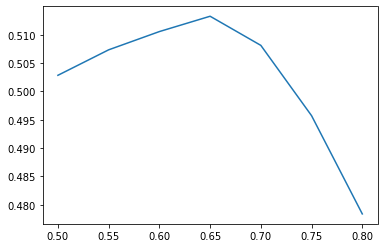

In [27]:
import matplotlib.pyplot as plt
plt.plot(thrshes, f1_lst)  

In [28]:
def find_best(dists, idx, thrshes = np.linspace(1.75,2.25,num=11)):
    f1_lst = []
    preds_lst = []
    for thrsh in tqdm(thrshes):
        preds = get_preds_by_thrsh(dists, idx, thrsh)
        preds = preds2pids(preds, pids)
        preds_lst.append(preds)
        f1 = meanf1(preds,targets)
        f1_lst.append(f1)
    f1_best, thrsh_best, preds_best = sorted(zip(f1_lst, thrshes, preds_lst), reverse=True)[0]
    return f1_best, thrsh_best, preds_best

In [29]:
f1_best, thrsh_best, preds_best = find_best(dists, idx, thrshes)

100%|██████████| 7/7 [00:01<00:00,  4.71it/s]


In [30]:
f1_best, thrsh_best

(0.5132549558367758, 0.65)

In [33]:
import utils
preds_h = utils.get_preds_pids_h(df)
meanf1(preds_h,targets)

0.5415179652897422